In [11]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

%matplotlib inline

In [12]:
resource_list = os.listdir('./data')
print(*resource_list, sep='\n')

symbols
Tab_Butterfly-Waltz-Ukulele
Tab_Vincent_Ukulele


In [13]:
#Read Image
resource_idx = 1
sheet_path = sorted([os.path.join('./data', resource_list[resource_idx], i) for i in os.listdir(os.path.join('./data', resource_list[resource_idx]))])

sheet = [cv2.imread(path_, cv2.IMREAD_GRAYSCALE) for path_ in sheet_path]

print(f'Folder : {resource_list[resource_idx]}')
print(f'Number of sheet : {len(sheet_path)}')
print(*[f'>{path_} :{img_.shape}' for path_, img_ in zip(sheet_path, sheet)], sep='\n')

Folder : Tab_Butterfly-Waltz-Ukulele
Number of sheet : 2
>./data\Tab_Butterfly-Waltz-Ukulele\p1.jpg :(2339, 1653)
>./data\Tab_Butterfly-Waltz-Ukulele\p2.jpg :(2339, 1653)


In [14]:
#Resize Image
sheet = [cv2.resize(img, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_LINEAR) for img in sheet]

print(f'Number of sheet : {len(sheet)}')
print(*[f'>{path_} :{img_.shape}' for path_, img_ in zip(sheet_path, sheet)], sep='\n')

Number of sheet : 2
>./data\Tab_Butterfly-Waltz-Ukulele\p1.jpg :(2339, 1653)
>./data\Tab_Butterfly-Waltz-Ukulele\p2.jpg :(2339, 1653)


In [15]:
sample_image = np.copy(sheet[0])

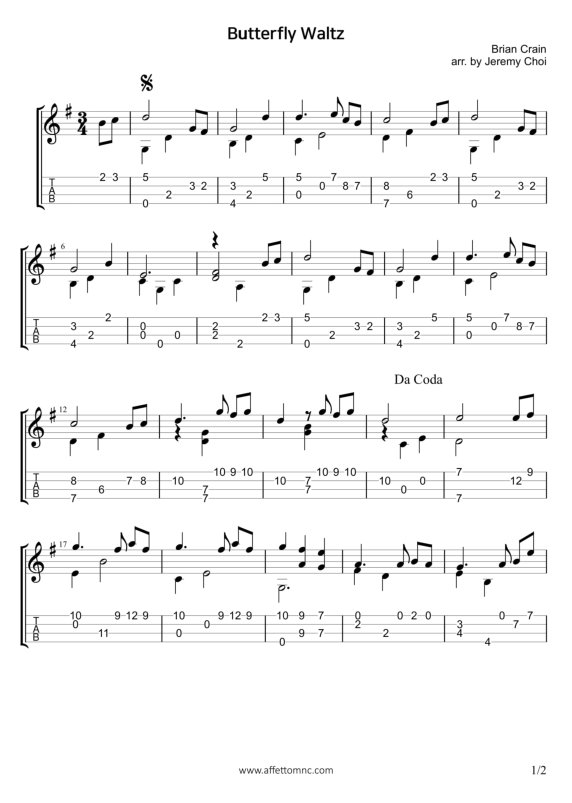

In [16]:
def show_single_image(image, show=True, figsize=(10,20)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    ax.imshow(image, cmap='gray')
    ax.axis('off')
    if show:
        plt.show()
    
show_single_image(sample_image)

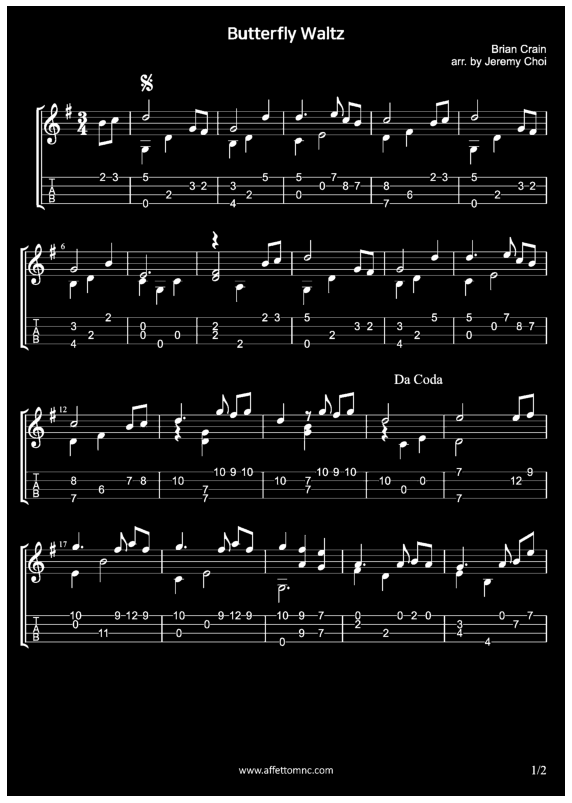

In [17]:
#Binarization
def threshold(image, threshold=None):
    if threshold==None:
        ret, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    else:
        ret, image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
        
    if ret:
        return image
    else:
        return None
    
sample_image = threshold(sample_image, threshold=200)
show_single_image(sample_image)

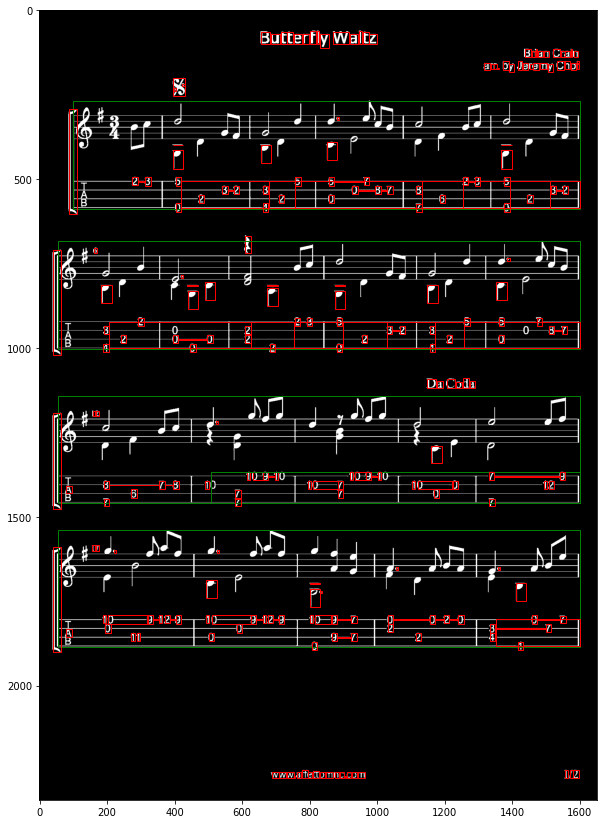

In [18]:
#Find Object
import matplotlib.patches as patches

numObj, labels, stats_, centroids = cv2.connectedComponentsWithStats(sample_image)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot()

image_height, image_width = sample_image.shape
width_threshold = 0.6


ax.imshow(sample_image, cmap='gray')

stats = {'x':[], 'y':[], 'w':[], 'h':[], 'area':[]}
for i in range(1, numObj):
    x, y, w, h, area = stats_[i] #stats[i] == (x, y, w, h, area)
    stats['x'].append(x); stats['y'].append(y)
    stats['w'].append(w); stats['h'].append(h)
    stats['area'].append(area)
    
    if w > image_width*width_threshold:
        eColor = 'green'
    else:
        eColor = 'red'
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor=eColor, fill=False))
    
plt.show()

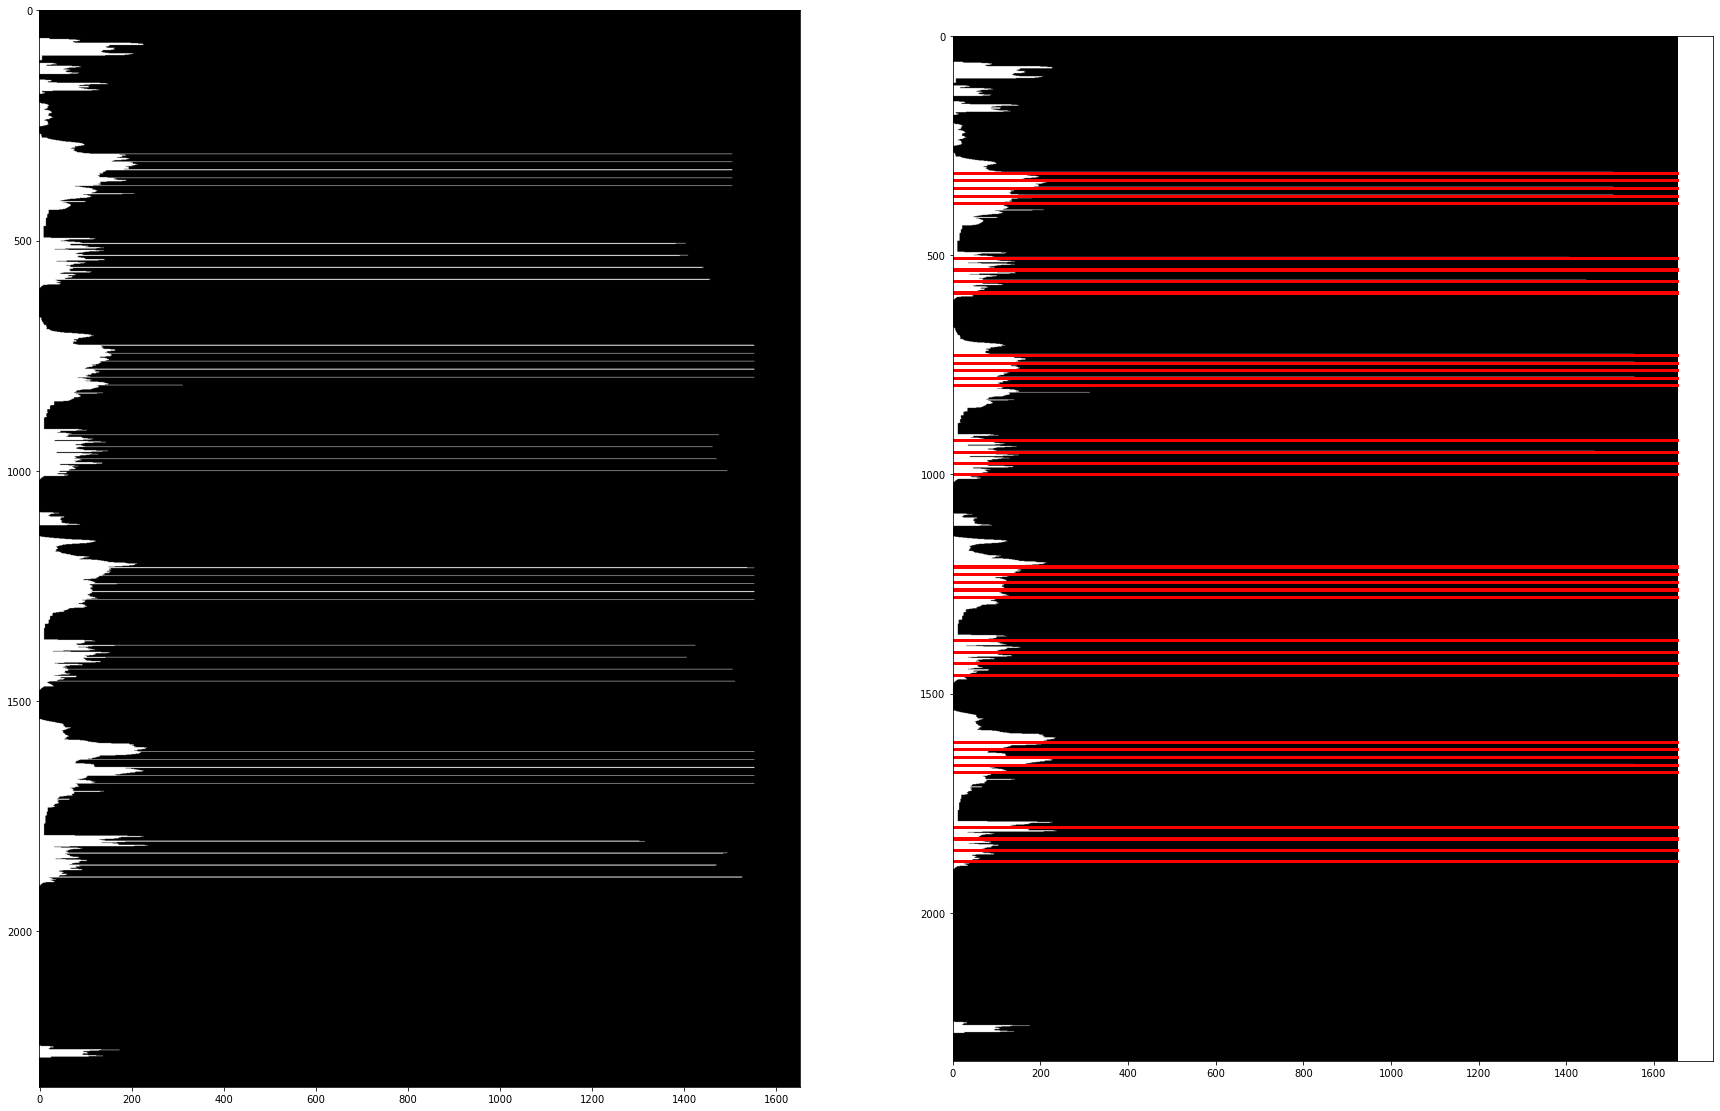

In [19]:
#Find lines
sample_image_ = np.uint8(sample_image/255)
pix_hist = np.sum(sample_image_, axis=1)
pix_hist_image = np.zeros(sample_image.shape)

for row, num in enumerate(pix_hist):
    pix_hist_image[row,:num] = 255

    
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(pix_hist_image, cmap='gray')

std_grid = [0, 20, 40, 60, 80, 100]
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(pix_hist_image, cmap='gray')
for row, num in enumerate(pix_hist):
    if num > image_width*width_threshold:
        ax2.plot([0, image_width], [row, row], '-r', linewidth=3)

plt.show()